<a href="https://colab.research.google.com/github/yogitjain3015/ANN_Project/blob/main/ANN_20220701001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MAIN CODE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FaceMask_Data/WithoutMask
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FaceMask_Data/WithoutMask
 Withoutmask1010.jpg   Withoutmask1015.jpg  'Withoutmask103 (1).jpg'   Withoutmask106.jpg
 Withoutmask1011.jpg   Withoutmask1016.jpg   Withoutmask103.jpg        Withoutmask107.jpg
 Withoutmask1012.jpg   Withoutmask101.jpg    Withoutmask104.jpg        Withoutmask108.jpg
 Withoutmask1014.jpg   Withoutmask102.jpg    Withoutmask105.jpg        Withoutmask109.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FaceMask_Data/WithMask
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FaceMask_Data/WithMask
WithMask1010.jpg  WithMask1014.jpg  WithMask102.jpg  WithMask106.jpg
WithMask1011.jpg  WithMask1015.jpg  WithMask103.jpg  WithMask107.jpg
WithMask1012.jpg  WithMask1016.jpg  WithMask104.jpg  WithMask108.jpg
WithMask1013.jpg  WithMask101.jpg   WithMask105.jpg  WithMask109.jpg


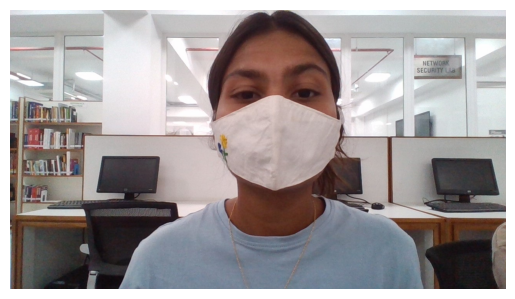

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/FaceMask_Data/WithMask/WithMask101.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


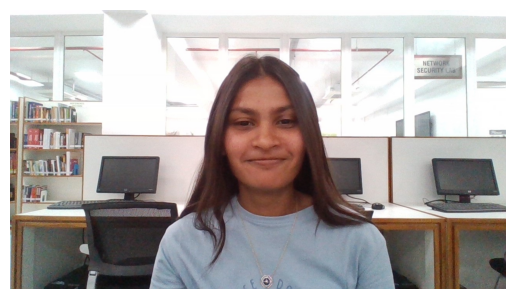

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/FaceMask_Data/WithoutMask/Withoutmask1016.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


# **Importing The** **Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/drive/MyDrive/FaceMask_Data/WithMask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['WithMask101.jpg', 'WithMask102.jpg', 'WithMask103.jpg', 'WithMask104.jpg', 'WithMask105.jpg']
['WithMask1012.jpg', 'WithMask1013.jpg', 'WithMask1014.jpg', 'WithMask1015.jpg', 'WithMask1016.jpg']


In [ ]:
without_mask_files = os.listdir('/content/drive/MyDrive/FaceMask_Data/WithoutMask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['Withoutmask103 (1).jpg', 'Withoutmask102.jpg', 'Withoutmask101.jpg', 'Withoutmask104.jpg', 'Withoutmask105.jpg']
['Withoutmask1012.jpg', 'Withoutmask103.jpg', 'Withoutmask1014.jpg', 'Withoutmask1015.jpg', 'Withoutmask1016.jpg']


In [ ]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 16
Number of without mask images: 16


# **Creating Labels for the two class of Images**

with mask --> 1  
without mask --> 0

In [ ]:
with_mask_labels = [1]*16

without_mask_labels = [0]*16

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

16
16


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

32
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying The Images**

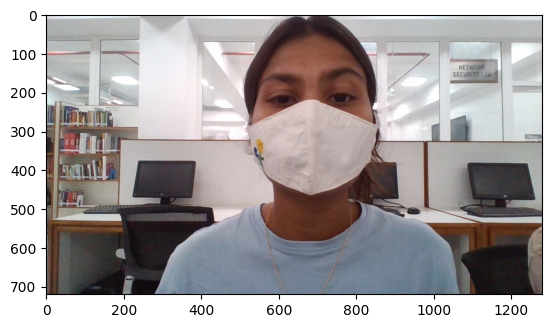

In [ ]:
# WITH MASK IMAGE

img = mpimg.imread('/content/drive/MyDrive/FaceMask_Data/WithMask/WithMask101.jpg')
imgplot = plt.imshow(img)
plt.show()

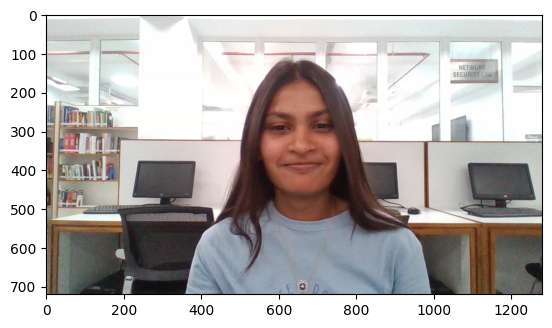

In [ ]:
# WITHOUT MASK IMAGE

img = mpimg.imread('/content/drive/MyDrive/FaceMask_Data/WithoutMask/Withoutmask1016.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Image Preprocessing**

Rezising the images

Converting the images into numpy arrays

In [ ]:
with_mask_path = '/content/drive/MyDrive/FaceMask_Data/WithMask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/drive/MyDrive/FaceMask_Data/WithoutMask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

32

array([[[222, 221, 229],
        [221, 224, 229],
        [223, 228, 232],
        ...,
        [222, 225, 232],
        [222, 224, 231],
        [221, 224, 229]],

       [[220, 221, 227],
        [224, 225, 231],
        [226, 229, 235],
        ...,
        [224, 227, 234],
        [225, 226, 234],
        [225, 225, 232]],

       [[192, 192, 196],
        [190, 192, 197],
        [193, 194, 201],
        ...,
        [214, 217, 223],
        [215, 217, 225],
        [214, 217, 224]],

       ...,

       [[105,  95, 100],
        [ 78,  51,  42],
        [ 79,  55,  44],
        ...,
        [ 59,  52,  53],
        [ 99,  81,  79],
        [104,  91,  82]],

       [[103,  92,  94],
        [ 79,  52,  37],
        [ 79,  57,  41],
        ...,
        [ 43,  36,  36],
        [ 87,  75,  71],
        [ 95,  85,  80]],

       [[101,  89,  91],
        [ 76,  50,  37],
        [ 78,  57,  42],
        ...,
        [ 37,  26,  25],
        [ 80,  65,  63],
        [ 95,  84,  82]]], dtype=uint8)
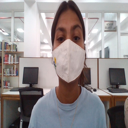

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(32, 128, 128, 3)
(32,)


In [ ]:
print(X)

[[[[222 221 229]
   [221 224 229]
   [223 228 232]
   ...
   [222 225 232]
   [222 224 231]
   [221 224 229]]

  [[220 221 227]
   [224 225 231]
   [226 229 235]
   ...
   [224 227 234]
   [225 226 234]
   [225 225 232]]

  [[192 192 196]
   [190 192 197]
   [193 194 201]
   ...
   [214 217 223]
   [215 217 225]
   [214 217 224]]

  ...

  [[105  95 100]
   [ 78  51  42]
   [ 79  55  44]
   ...
   [ 59  52  53]
   [ 99  81  79]
   [104  91  82]]

  [[103  92  94]
   [ 79  52  37]
   [ 79  57  41]
   ...
   [ 43  36  36]
   [ 87  75  71]
   [ 95  85  80]]

  [[101  89  91]
   [ 76  50  37]
   [ 78  57  42]
   ...
   [ 37  26  25]
   [ 80  65  63]
   [ 95  84  82]]]


 [[[253 255 254]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[223 222 229]
   [222 224 225]
   [221 225 226]
   ...
   [246 249 249]
   [248 250 250]
   [248 249

In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# **Train Test Split**

In [ ]:
X_train , X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(32, 128, 128, 3) (25, 128, 128, 3) (7, 128, 128, 3)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(32,) (25,) (7,)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 254, 255],
        [254, 254, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[223, 227, 230],
        [223, 227, 230],
        [223, 228, 230],
        ...,
        [250, 250, 251],
        [248, 250, 251],
        [248, 251, 251]],

       ...,

       [[128, 119, 106],
        [104,  67,  50],
        [108,  76,  63],
        ...,
        [ 68,  71,  64],
        [ 87,  84,  80],
        [ 95,  87,  81]],

       [[125, 113, 102],
        [102,  72,  54],
        [108,  79,  66],
        ...,
        [ 68,  73,  66],
        [ 90,  84,  77],
        [ 91,  82,  78]],

       [[125, 111, 102],
        [ 97,  73,  53],
        [101,  79,  62],
        ...,
        [ 67,  73,  70],
        [ 86,  85,  75],
        [ 85,  80,  75]]], dtype=uint8)
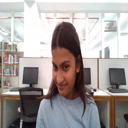

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 0.99607843, 1.        ],
        [1.        , 0.99607843, 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.8745098 , 0.89019608, 0.90196078],
        [0.8745098 , 0.89019608, 0.90196078],
        [0.8745098 , 0.89411765, 0.90196078],
        ...,
        [0.98039216, 0.98039216, 0.98431373],
        [0.97254902, 0.98039216, 0.98431373],
        [0.97254902, 0.98431373, 0.98431373]],

       ...,

       [[0.50196078, 0.46666667, 0.41568627],
        [0.40784314, 0.2627451 , 0.19607843],
        [0.42352941, 0

# **Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3),activation = 'relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

## Compiling the NN

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

## Training the NN

In [ ]:
history = model.fit(X_train_scaled , Y_train , validation_split = 0.1, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.6160e-04 - acc: 1.0000 - val_loss: 0.0326 - val_acc: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 953ms/step - loss: 1.5300e-04 - acc: 1.0000 - val_loss: 0.0298 - val_acc: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 973ms/step - loss: 7.6174e-04 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 920ms/step - loss: 2.9789e-05 - acc: 1.0000 - val_loss: 0.0251 - val_acc: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 609ms/step - loss: 2.2909e-04 - acc: 1.0000 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 636ms/step - loss: 5.9928e-06 - acc: 1.0000 - val_loss: 0.0216 - val_acc: 1.0000
Epoch 7/100
1/1 [==============================] - 1s 594ms/step - loss: 4.9953e-05 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 8/100
1/1 [==============================] - 1s 540m

## Model Evaluation

In [ ]:
loss, accuracy =  model.evaluate(X_test_scaled, Y_test)
print('Accuracy = ' ,accuracy)

1/1 [==============================] - 0s 74ms/step - loss: 0.0478 - acc: 1.0000
Accuracy =  1.0


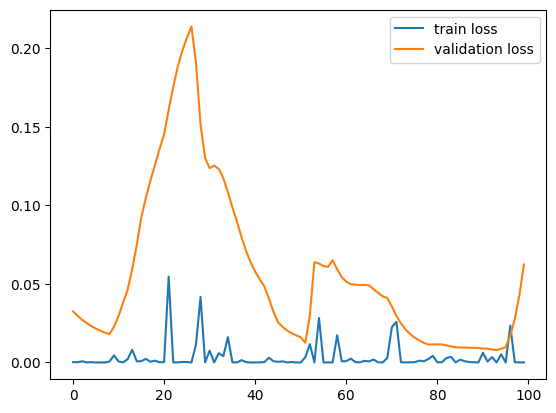

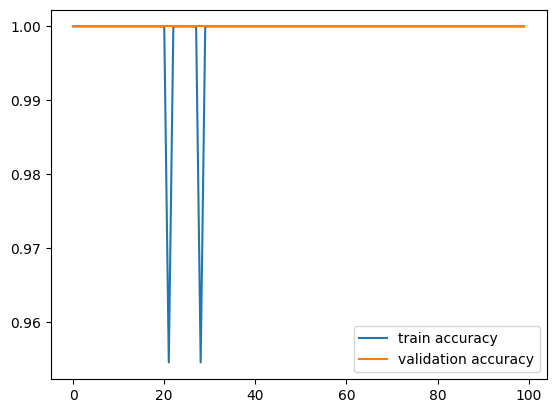

In [ ]:
h  = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

# **PREDICTIVE SYSTEM**

Path of the image to be predicted:/content/drive/MyDrive/FaceMask_Data/test3.jpeg


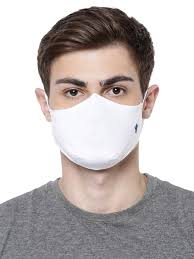

1/1 [==============================] - 0s 45ms/step
[[0.12583366 0.94457924]]
1
 The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print(" The person in the image is wearing a mask")

else:
  print("The person in the image is not wearing a mask")

Path of the image to be predicted:/content/drive/MyDrive/FaceMask_Data/test2.jpeg


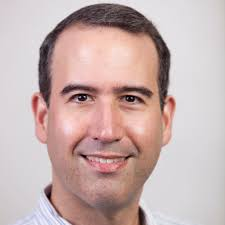

1/1 [==============================] - 0s 29ms/step
[[0.82185346 0.3838921 ]]
0
The person in the image not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print(" The person in the image is wearing a mask")
else:
  print("The person in the image not wearing a mask")